In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats
from cooltools.lib import numutils

/home1/smaruj/miniconda3/envs/basenji_py3.9_tf2.15/lib/python3.9/site-packages/cooltools/lib/numutils.py:652: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_symmetric(
/home1/smaruj/miniconda3/envs/basenji_py3.9_tf2.15/lib/python3.9/site-packages/cooltools/lib/numutils.py:727: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_co

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import read_multi_model_double_flanks_data

In [3]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_flanks/double_insertion_flanks/"

In [4]:
df = read_multi_model_double_flanks_data(data_dir)

In [5]:
# distinct colors for different orientations
convergent_color = "#1f77b4" #Vivid Cyan-Blue
divergent_color = "#ff7f0e" #Bright Orange
left_color = "#2ca02c" #Crisp Green
right_color = "#d62728" #Rich Magenta

In [6]:
# splitting the data by orientation
right_df = df[df["orientation"] == ">>"].groupby(["flank_bp"]).agg({"SCD": "mean", "INS-16": "mean", "INS-64": "mean"}).reset_index()
convergent_df = df[df["orientation"] == "><"].groupby(["flank_bp"]).agg({"SCD": "mean", "INS-16": "mean", "INS-64": "mean"}).reset_index()
divergent_df = df[df["orientation"] == "<>"].groupby(["flank_bp"]).agg({"SCD": "mean", "INS-16": "mean", "INS-64": "mean"}).reset_index()
left_df = df[df["orientation"] == "<<"].groupby(["flank_bp"]).agg({"SCD": "mean", "INS-16": "mean", "INS-64": "mean"}).reset_index()

Text(0, 0.5, 'Insertion Score')

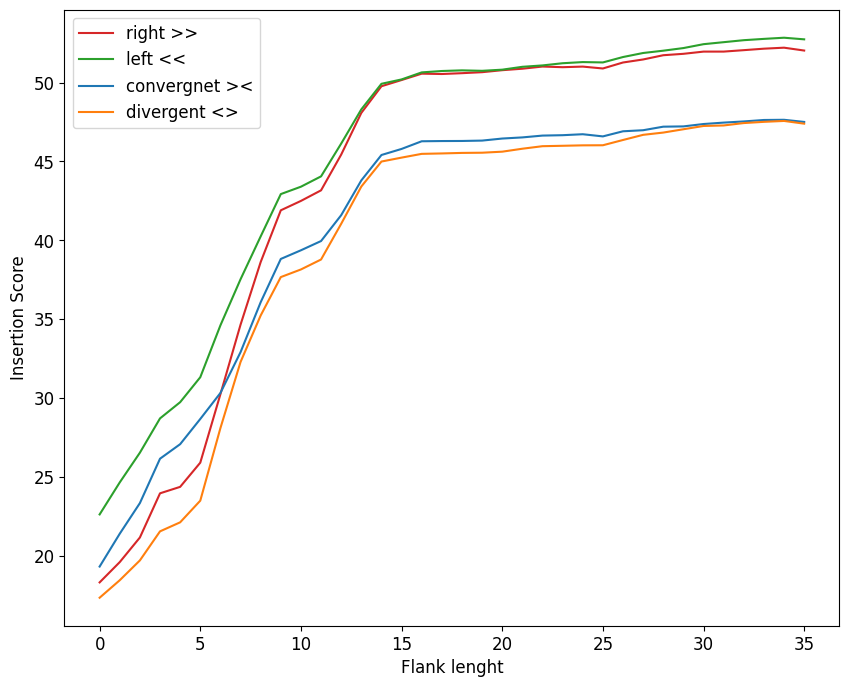

In [7]:
plt.figure(figsize=(10,8))
x = [x for x in range(36)]

plt.plot(x, right_df["SCD"], c=right_color, label="right >>")
plt.plot(x, left_df["SCD"], c=left_color, label="left <<")
plt.plot(x, convergent_df["SCD"], c=convergent_color, label="convergnet ><")
plt.plot(x, divergent_df["SCD"], c=divergent_color, label="divergent <>")

plt.legend()
plt.xlabel("Flank lenght")
plt.ylabel("Insertion Score")

## Plot with smoothed lines

In [8]:
bin_size = 11

In [9]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [10]:
right_percentiles = df[df["orientation"] == ">>"].groupby(["flank_bp"])["SCD"].agg(
    percentile25 = percentile(25), percentile75 = percentile(75)).reset_index()
left_percentiles = df[df["orientation"] == "<<"].groupby(["flank_bp"])["SCD"].agg(
    percentile25 = percentile(25), percentile75 = percentile(75)).reset_index()
convergent_percentiles = df[df["orientation"] == "><"].groupby(["flank_bp"])["SCD"].agg(
    percentile25 = percentile(25), percentile75 = percentile(75)).reset_index()
divergent_percentiles = df[df["orientation"] == "<>"].groupby(["flank_bp"])["SCD"].agg(
    percentile25 = percentile(25), percentile75 = percentile(75)).reset_index()

Text(0, 0.5, 'Insertion Score')

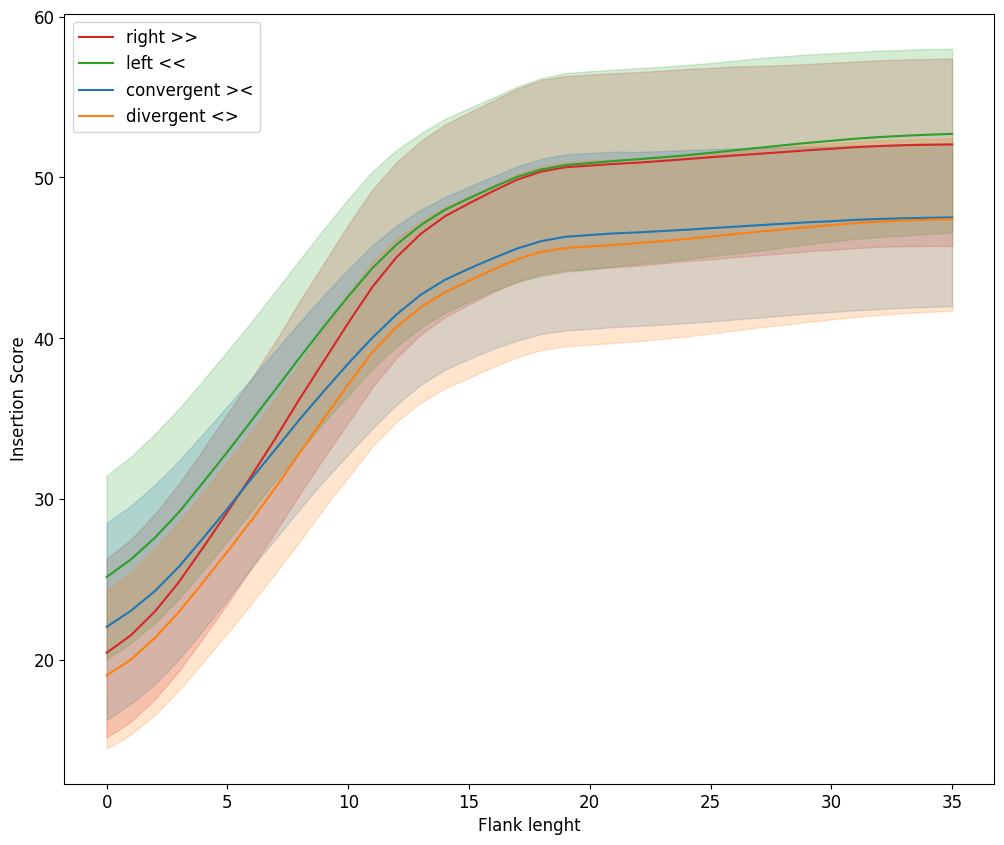

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))
x = [x for x in range(36)]

# right
plt.plot(x, numutils.smooth(right_df["SCD"], bin_size), c=right_color, label="right >>")
R_percentile25_line = numutils.smooth(right_percentiles["percentile25"], bin_size)
R_percentile75_line = numutils.smooth(right_percentiles["percentile75"], bin_size)
ax.fill_between(x, R_percentile25_line, R_percentile75_line, alpha=0.20, color=right_color) 

# right
plt.plot(x, numutils.smooth(left_df["SCD"], bin_size), c=left_color, label="left <<")
L_percentile25_line = numutils.smooth(left_percentiles["percentile25"], bin_size)
L_percentile75_line = numutils.smooth(left_percentiles["percentile75"], bin_size)
ax.fill_between(x, L_percentile25_line, L_percentile75_line, alpha=0.20, color=left_color) 

# convergent
plt.plot(x, numutils.smooth(convergent_df["SCD"], bin_size), c=convergent_color, label="convergent ><")
C_percentile25_line = numutils.smooth(convergent_percentiles["percentile25"], bin_size)
C_percentile75_line = numutils.smooth(convergent_percentiles["percentile75"], bin_size)
ax.fill_between(x, C_percentile25_line, C_percentile75_line, alpha=0.20, color=convergent_color) 

# divergent
plt.plot(x, numutils.smooth(divergent_df["SCD"], bin_size), c=divergent_color, label="divergent <>")
D_percentile25_line = numutils.smooth(divergent_percentiles["percentile25"], bin_size)
D_percentile75_line = numutils.smooth(divergent_percentiles["percentile75"], bin_size)
ax.fill_between(x, D_percentile25_line, D_percentile75_line, alpha=0.20, color=divergent_color) 

plt.legend(loc="upper left")
plt.xlabel("Flank lenght")
plt.ylabel("Insertion Score")
# plt.savefig("./plots/double_insertion_flank_length_vs_insertion_score.pdf", format="pdf", bbox_inches="tight")